# Deep Learning - Model Development

## Task 3.1: Create an Image Dataset

### A: Dataset Creation

### **Dataset Requirements**
To create my dataset, I outlined specific requirements to ensure it met the needs of my project:
- **Classes:**
    - Bench
    - Dumbbells
    - Chest Press
    - Leg Press
- **Image Diversity:**
    - Captured from different angles.
    - Representing various gym equipment brands.
    - Featuring diverse backgrounds, such as gyms, outdoor settings, and plain white backgrounds.
- **Quality Control:**
    - Ensure no duplicate images.
    - All images must be in JPG format.
- **Quantity:**
    - At least 100 images per class.

With these requirements in mind, I followed a structured process to create the dataset.

### **Step 1: Initial Search for Existing Datasets**
I began by exploring existing datasets to see if any could meet my requirements. Unfortunately, most datasets I found primarily consisted of PNG images with transparent backgrounds, which were unsuitable for my project.

I identified a few datasets on [Roboflow Universe](https://universe.roboflow.com/). However, these datasets were:
- Pre-split into training, validation, and test sets.
- Contained numerous additional classes that I did not need.

While these datasets were not immediately useful, I noted them as potential resources for later stages of the project.

### **Step 2: Sourcing Images from Stock Photo Websites**
Next, I turned to free stock photo websites, including:
- [Pexels](https://www.pexels.com/)
- [PixaBay](https://pixabay.com/)
- [Unsplash](https://unsplash.com/)

These platforms provided a small number of images (approximately 10–15 per class). While useful, this approach was not sufficient to meet the dataset size requirement.

### **Step 3: Scraping Images from Marketplaces**
Recognizing that the type of images I needed—lower-quality, mobile-shot photos without people—might be found on marketplaces, I investigated several websites. I ultimately selected the following four platforms:
- [BuyAndSellFitness](https://www.buyandsellfitness.com/)
- [GymEquip](https://www.gymequip.eu/)
- [FitnessEquipmentEmpire](https://www.fitnessequipmentempire.com/)
- [PinnacleFitness](https://www.pinnaclefitness.org.uk/)

To collect images efficiently, I wrote a basic web-scraping script: [image_scraping.ipynb](https://github.com/BredaUniversityADSAI/2024-25c-fai1-adsai-ErikHrina230395/blob/main/Deliverables/Scripts/image_scraping.ipynb). Though simple and imperfect, the script successfully gathered a significant number of images, particularly for dumbbells and benches. However, I still lacked sufficient images for leg press and chest press machines.

### **Step 4: Revisiting Roboflow Universe**
To address the shortfall, I revisited Roboflow Universe and identified three potentially useful datasets:
- [Gym Equipment Segmentation](https://universe.roboflow.com/talha-asif-bozhn/gym-equipment-segmentation)
- [All Gym Equipment](https://universe.roboflow.com/fitfuel/all-gym-equipment)
- [healnion Computer Vision Project](https://universe.roboflow.com/hn-2kixi/healnion-f4l32)

I manually reviewed these datasets to select only the most relevant and suitable images. This step significantly increased the image count for all classes, bringing each class to approximately 130–160 images.

### **Step 5: Finalizing the Dataset with Google Search**
For additional images, I used **Google Search** with terms such as "dumbbells for sale" or "chest press machines." I also utilized **Google Lens** to locate similar photos matching the quality and style of my existing images.

### **Final Dataset Summary**
After gathering images from all sources, I assembled a dataset containing **180 images** for each of the four classes: bench, dumbbells, chest press, and leg press.

This process ensured a diverse, high-quality dataset suitable for my project objectives.

### B: Dataset Cleaning

To ensure the dataset was clean, consistent, and ready for use, I followed a three-step process:

### **Step 1: Removing Duplicates**
Duplicate images can negatively impact the training process by skewing the dataset's balance and introducing redundancy. During the scraping process, some images were downloaded multiple times. This occurred because certain websites included hidden elements or dynamic image-loading mechanisms, which caused the script to misinterpret the content and save duplicate images.

To address this, I implemented an automated method to identify and remove duplicates by comparing image hashes. This approach ensured that only unique images remained in the dataset, eliminating redundancies introduced during the scraping phase.

### **Step 2: Converting File Formats**
To maintain uniformity and compatibility, all images were converted to a single format, JPG. This format was chosen for its wide acceptance and efficient compression while preserving image quality. The conversion process handled a mix of input formats such as PNG and WebP, ensuring all files used the same standard.

### **Step 3: Renaming Files with a Unified Naming Convention**
To make the dataset more organized and manageable, I renamed all files to follow a consistent naming scheme:
`<class>_<number>.jpg`
- **Class:** Indicates the image category (e.g., bench, dumbbells, chest_press, leg_press).
- **Number:** A unique numerical identifier for each image within its class.

For example:
- `dumbbells_1.jpg`
- `bench_45.jpg`

### **Automation with a Cleaning Script**
To streamline these tasks, I developed a simple script: [dataset_cleaning.ipynb](https://github.com/BredaUniversityADSAI/2024-25c-fai1-adsai-ErikHrina230395/blob/main/Deliverables/Scripts/dataset_cleaning.ipynb).

By addressing issues such as duplicate downloads caused by hidden website elements and ensuring a consistent format and structure, the cleaning process prepared the dataset for use.

### C: Final Dataset

Dataset: [BUas SharePoint](https://edubuas-my.sharepoint.com/:f:/g/personal/230395_buas_nl/Es5WzapTumtLqGt_B7b4u_sBhslMpToO2sqjQH2Tbdz_uQ?e=gS3Jfy)

### D: Load and Split

To prepare the dataset for deep learning, I created three functions:
### 1. `preprocess_and_convert_to_jpg`
- **What it does:**
    - This function takes an image, changes it to JPEG format, and gets it ready for the model to use.
- **Why JPEG?**
    - JPEG is a common format for images and makes sure all the pictures are in the same format.
- **How it works:**
    - It resizes the image to `(256, 256)` pixels to keep it small but still detailed enough to recognize gym equipment.
    - If the image has 4 channels (RGBA), it drops the alpha channel.

### 2. `get_features_and_labels`
- **What it does:**
    - This function looks at a folder full of images, takes out the image data, and matches them with the correct labels.
- **How it works:**
    - It assumes the folder is organized by classes (one folder for each type of gym equipment).
    - It reads the folder names as the labels and changes them into numbers since models work with numbers, not text.

### 3. `split_and_prepare_dataset`
- **What it does:**
    - This function splits the dataset into three parts:
        1. Training set (70% of the data) – used to teach the model.
        2. Validation set (20% of the data) – used to check how well the model is learning during training.
        3. Test set (10% of the data) – used to check how well the model works on new, unseen images.
    - It also converts the labels into numbers so the model can understand them.

### **Details About the Dataset**
- **Image Size:** All images are resized to `(256, 256)` to keep important details of the gym equipment, which helps the model tell the difference between them.
- **Class Organization:** Each type of gym equipment is in its own folder, which helps match the images to the right labels.

### **Results After Splitting:**
- Training set: 504 images (70%)
- Validation set: 144 images (20%)
- Test set: 72 images (10%)

These three functions work together to make the dataset clean, organized, and ready for deep learning. They are also simple to reuse for other projects if needed.

In [94]:
# Base directory
base_dir = '../Data/equipment'

# Models directory
models_dir = 'Models/'

# Subfolders
class_labels = ['bench', 'dumbbells', 'chest_press', 'leg_press']

# Target size to resize the images
target_size = (256, 256)

# Mapping
label_mapping = {'bench': 0, 'dumbbells': 1, 'chest_press': 2, 'leg_press': 3}

In [ ]:
import cv2

def preprocess_and_convert_to_jpg(image, target_size=(256, 256), normalize=True):
    """
    Converts an image to JPEG format in memory and preprocess it for deep learning.

    Args:
        image (numpy.ndarray): The image loaded using cv2.imread().
        target_size (tuple): Desired image size (width, height).
        normalize (bool): Whether to normalize pixel values to [0, 1].

    Returns:
        numpy.ndarray: Preprocessed image array in JPEG format.
    """
    # Encode the image as JPEG in memory
    success, encoded_image = cv2.imencode('.jpg', image)
    if not success:
        raise ValueError("Failed to encode image to JPEG format.")

    # Decode it back to NumPy array
    image = cv2.imdecode(encoded_image, cv2.IMREAD_COLOR)

    # If the image has 4 channels, drop the alpha channel
    if image.shape[2] == 4:
        image = image[:, :, :3]

    # Resize image to the target size
    image = cv2.resize(image, target_size)

    # Normalize pixel values if required
    if normalize:
        image = image.astype('float32') / 255.0

    return image

In [ ]:
import os
import numpy as np
from skimage.io import imread

def get_features_and_labels(base_dir, class_labels, target_size=(256, 256)):
    """
    Extracts features and labels from a directory for deep learning.

    Args:
        base_dir (str): The base directory containing subfolders for each class.
        class_labels (list): A list of class names corresponding to the subfolder names in `base_dir`.
        target_size (tuple): The desired dimensions (width, height) for resizing images.

    Returns:
        tuple: 
            - X (numpy.ndarray): Array of preprocessed image data.
            - y (numpy.ndarray): Array of corresponding class labels
    """
    X = []
    y = []
    
    for i in range(len(class_labels)):
        folder_path = os.path.join(base_dir, class_labels[i])
        for filename in os.listdir(folder_path):
            image_filename = os.path.join(folder_path, filename)
            # Read the image file using scikit-image
            image = imread(image_filename)
            # Preprocess the image
            image_processed = preprocess_and_convert_to_jpg(image, target_size, False)
            # Insert the image into array X
            X.append(image_processed)
            # Insert the class label into array y
            y.append(class_labels[i])

    return np.array(X), np.array(y)

In [97]:
from sklearn.model_selection import train_test_split
import numpy as np

def split_and_prepare_dataset(X, y, label_mapping, test_size=0.1, val_size=0.222, random_state=42):
    """
    Splits the dataset into training, validation, and test sets, and converts string labels to numerical labels.

    Args:
        X (numpy.ndarray): Feature dataset.
        y (numpy.ndarray): Corresponding labels for the dataset.
        label_mapping (dict): A dictionary mapping string labels to numerical values.
        test_size (float): Proportion of the dataset to be used as the test set.
        val_size (float): Proportion of the training set to be used as the validation set.
        random_state (int): Seed for reproducibility of the split.

    Returns:
        tuple: 
            - X_train (numpy.ndarray): Training features.
            - X_valid (numpy.ndarray): Validation features.
            - X_test (numpy.ndarray): Test features.
            - y_train (numpy.ndarray): Training labels (numerical).
            - y_valid (numpy.ndarray): Validation labels (numerical).
            - y_test (numpy.ndarray): Test labels (numerical).
    """
    # Split into initial train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Further split train into training and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=val_size, random_state=random_state, stratify=y_train
    )

    # Convert string labels to numerical labels using label mapping
    y_train = np.array([label_mapping[label] for label in y_train])
    y_valid = np.array([label_mapping[label] for label in y_valid])
    y_test = np.array([label_mapping[label] for label in y_test])

    # Print dataset sizes
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Validation set size: {X_valid.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")

    return X_train, X_valid, X_test, y_train, y_valid, y_test


In [98]:
X, y = get_features_and_labels(base_dir, class_labels, target_size)

In [99]:
# Split and prepare dataset
X_train, X_valid, X_test, y_train, y_valid, y_test = split_and_prepare_dataset(X, y, label_mapping)

Training set size: 504
Validation set size: 144
Test set size: 72


## Task 3.2: Calculate Baselines

### A: Random Guess Accuracy

The random guess accuracy represents the likelihood of correctly predicting the class of an image purely by chance. It is calculated using the following formula:

$$
\text{Random Guess Accuracy} = \frac{100}{n}
$$

Where:
- $n$ is the number of classes in the dataset.

For this project, the dataset includes 4 classes:
- Bench
- Dumbbells
- Chest Press
- Leg Press

Using the formula:

$$
\text{Random Guess Accuracy} = \frac{100}{4} = 25\%
$$

Thus, the random guess accuracy for this dataset is **25%**.

### B: Basic Multilayer Perceptron Accuracy

#### I: Preprocessing

In [ ]:
# Display shapes of each set
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape 

((504, 256, 256, 3),
 (504,),
 (72, 256, 256, 3),
 (72,),
 (144, 256, 256, 3),
 (144,))

In [ ]:
# Preprocess each set
from keras.utils import to_categorical

X_train, y_train = X_train.reshape((504, 256*256*3)).astype('float32'), to_categorical(y_train)
X_valid, y_valid = X_valid.reshape((144, 256*256*3)).astype('float32'), to_categorical(y_valid)
X_test, y_test = X_test.reshape((72, 256*256*3)).astype('float32'), to_categorical(y_test)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((504, 196608), (504, 4), (144, 196608), (144, 4), (72, 196608), (72, 4))

#### II: MLP Architecture 

In [ ]:
# Define a simple MLP
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(128, input_shape=(196608,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               25165952  
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 4)                 132       
                                                                 
Total params: 25176420 (96.04 MB)
Trainable params: 25176420 (96.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### III: MLP Training

In [ ]:
# Compile the model with custom learning rate
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Add early stopping as a callback
from keras.callbacks import EarlyStopping
monitor_val_loss = EarlyStopping(monitor='val_loss',
                                 patience=5,
                                 restore_best_weights=True)

In [107]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=30, batch_size=20,
                    callbacks=[monitor_val_loss],
                    validation_data=(X_valid, y_valid))

Epoch 1/30
26/26 [==============================] - 4s 127ms/step - loss: 9516.7295 - accuracy: 0.2996 - val_loss: 2407.8088 - val_accuracy: 0.2639
Epoch 2/30
26/26 [==============================] - 3s 117ms/step - loss: 1706.5500 - accuracy: 0.3671 - val_loss: 1386.1978 - val_accuracy: 0.3958
Epoch 3/30
26/26 [==============================] - 3s 120ms/step - loss: 1731.6161 - accuracy: 0.4306 - val_loss: 1524.0651 - val_accuracy: 0.4167
Epoch 4/30
26/26 [==============================] - 3s 119ms/step - loss: 907.9457 - accuracy: 0.4385 - val_loss: 1130.9868 - val_accuracy: 0.4097
Epoch 5/30
26/26 [==============================] - 3s 119ms/step - loss: 1100.2380 - accuracy: 0.4563 - val_loss: 1095.6550 - val_accuracy: 0.4167
Epoch 6/30
26/26 [==============================] - 3s 116ms/step - loss: 578.2766 - accuracy: 0.5615 - val_loss: 1343.2283 - val_accuracy: 0.4653
Epoch 7/30
26/26 [==============================] - 3s 117ms/step - loss: 643.2181 - accuracy: 0.5675 - val_loss: 

#### IV: MLP Evaluation

In [ ]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test)
val_loss, val_acc

3/3 [==============================] - 0s 9ms/step - loss: 787.4885 - accuracy: 0.4028


(787.488525390625, 0.4027777910232544)

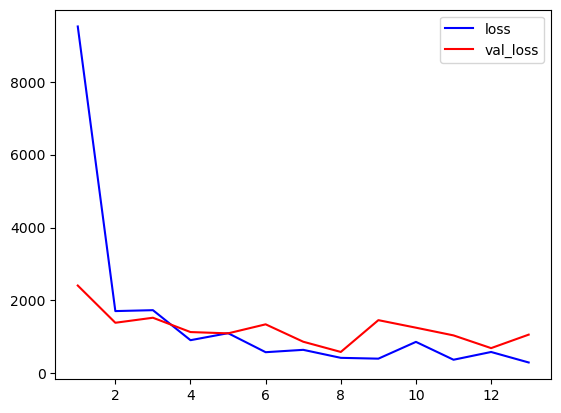

In [ ]:
# Display learning curves
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.legend()
plt.show()    

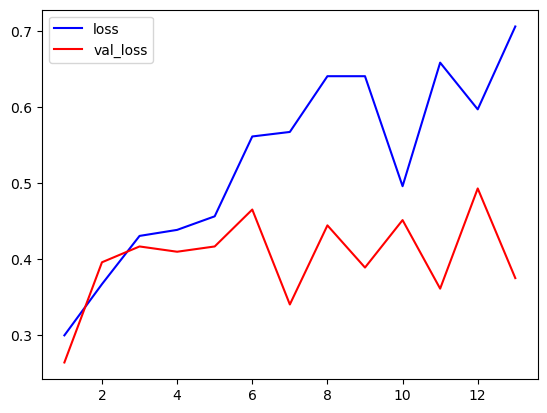

In [110]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='loss')
plt.plot(epochs, val_acc, 'r', label='val_loss')
plt.legend()
plt.show()    

To optimize model performance, I experimented with different learning rates, including 0.1, 0.01, 0.001, and 0.0001. The best results were achieved with a learning rate of 0.001, which produced an **accuracy of 40.28%**. For training, I implemented `EarlyStopping` with a patience of 5 epochs to prevent overfitting and used a batch size of 20 across 30 epochs. The learning curves indicated that the model started to overfit early in the training process. Despite this, the accuracy achieved serves as a good baseline considering the simplicity of the model used.

### C: Human-Level Performance Accuracy

To estimate how well humans could perform on this task, I created a questionnaire using *Microsoft Forms*. It included 40 questions, with 10 questions for each of the four classes. Six people answered the survey, including experienced gym-goers, beginners, and people who don’t go to the gym at all.

I calculated the average score from their answers like this:

$$
\text{Human-Level Performance Accuracy} = \frac{95 + 95 + 85 + 95 + 95 + 100}{6} = 94.166\%
$$

After rounding, the human-level performance accuracy came out to **94.17%**. This is a high baseline and shows that it will be challenging for the model to reach the same level of accuracy.

## Task 3.3: Basic Convolutional Neural Network (Iteration 1)

### A: Preprocessing

The preprocessing step for the basic CNN model was straightforward. To prepare the dataset for training, I started by one-hot encoding the labels for all three sets (training, validation, and test) using the `to_categorical` function from Keras. This is essential because neural networks, including CNNs, require the labels to be in a numerical format, and one-hot encoding ensures that each label is represented as a vector. This makes it easier for the model to calculate the loss function and optimize the weights.

In [111]:
X, y = get_features_and_labels(base_dir, class_labels, target_size)

In [112]:
# Split and prepare dataset
X_train, X_valid, X_test, y_train, y_valid, y_test = split_and_prepare_dataset(X, y, label_mapping)

Training set size: 504
Validation set size: 144
Test set size: 72


In [113]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((504, 256, 256, 3),
 (504, 4),
 (144, 256, 256, 3),
 (144, 4),
 (72, 256, 256, 3),
 (72, 4))

### B: CNN Architecture

For the architecture of the CNN, I opted for a simple and widely-used design, as I was starting with a basic model. Here's why:
- **Conv2D Layers with 3x3 Kernel:** I used `Conv2D` layers with a kernel size of 3x3. This is a common choice because smaller kernels like 3x3 are computationally efficient and capture local patterns effectively.
- **ReLU Activation:** I used the ReLU (Rectified Linear Unit) activation function for each convolutional layer. ReLU is simple yet powerful, allowing the network to learn non-linear relationships.
- **MaxPooling2D:** `MaxPooling2D` layers were added after each `Conv2D` layer. This down-sampling helps in reducing computational load, prevents overfitting by forcing the network to generalize, and can also make the model invariant to small translations in the image.
- **Increasing Filters:** With each subsequent convolutional layer, I increased the number of filters. This is a common practice as the deeper layers of the network should capture more complex features.
- **Flatten and Dense Layers:** After passing through the convolutional and pooling layers, I used a `Flatten` layer to transform the 2D output into a 1D vector. This is necessary because the fully connected `Dense` layers that follow require a 1D input. I chose a `Dense` layer with 4 neurons, each corresponding to one of the 4 classes of gym equipment. I used a `softmax` activation function on the output layer to convert the raw output into probabilities, with each value representing the likelihood of each class.

In [114]:
# Add your code to create an MLP architecture suitable for your image dataset.
from keras.models import Model
from keras import Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a CNN model
inputs = Input(shape=(256, 256, 3))
x = Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(4, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

### C: CNN Training

To train the model, I used the `categorical_crossentropy` loss function, which is standard for multi-class classification problems. This loss function measures the difference between the true labels and the predicted probabilities and helps the model learn by minimizing the error. I selected the `Adam` optimizer with a custom learning rate. After experimenting with different learning rates, I found that a very small learning rate of **0.00007** yielded the best results. Even though small, this learning rate allowed the model to converge without overshooting the best solution. 

I also set up two callbacks:
- `ModelCheckpoint`: I used this callback to save the best model based on the validation loss. This is useful because, during training, the model might start overfitting, meaning it could perform well on the training set but poorly on the validation set. By saving the model with the best validation performance, I can ensure that the model I evaluate at the end is the one that performs best.
- `EarlyStopping`: I also used the early stopping callback with a patience value of 7. This means that if the validation loss doesn’t improve for 7 epochs, training stops. This prevents the model from overfitting by stopping early and saving resources.

In [115]:
# Add your code to train the MLP model using early stopping and different learning rates.
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00007), loss='categorical_crossentropy', metrics=['accuracy'])

In [116]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
monitor_val_loss = EarlyStopping(monitor='val_loss',
                                 patience=7,
                                 restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
        filepath=f'{models_dir}cnn_task_3-3.keras',
        save_best_only=True,
        monitor='val_loss')

callbacks = [
    monitor_val_loss,
    model_checkpoint,
]

In [117]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=30,
                    callbacks=callbacks,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 6s 361ms/step - loss: 40.8444 - accuracy: 0.2619 - val_loss: 10.7333 - val_accuracy: 0.3611
Epoch 2/30
16/16 [==============================] - 6s 347ms/step - loss: 5.7077 - accuracy: 0.3889 - val_loss: 2.8324 - val_accuracy: 0.4097
Epoch 3/30
16/16 [==============================] - 5s 344ms/step - loss: 1.2203 - accuracy: 0.6071 - val_loss: 1.5681 - val_accuracy: 0.5278
Epoch 4/30
16/16 [==============================] - 6s 349ms/step - loss: 0.5889 - accuracy: 0.7857 - val_loss: 1.3776 - val_accuracy: 0.5278
Epoch 5/30
16/16 [==============================] - 6s 352ms/step - loss: 0.2238 - accuracy: 0.9365 - val_loss: 1.3218 - val_accuracy: 0.5486
Epoch 6/30
16/16 [==============================] - 5s 345ms/step - loss: 0.0911 - accuracy: 0.9861 - val_loss: 1.2292 - val_accuracy: 0.6042
Epoch 7/30
16/16 [==============================] - 5s 343ms/step - loss: 0.0390 - accuracy: 0.9960 - val_loss: 1.2954 - val_accuracy: 0.5556
Epoc

### D: Model Evaluation

During the training process, I noticed that the model started to overfit early, as indicated by the validation loss increasing after a few epochs. This is common when a model starts to memorize the training data rather than learning generalizable features. The model ended up training for only 13 out of 30 epochs, as the EarlyStopping callback stopped the process early.

After training, I evaluated the performance of the model on the test set. The test accuracy was **61.11%**, which is significantly better than random guessing. This suggests that the basic CNN model was able to learn some important patterns in the data but still has room for improvement.

In [118]:
# Add your code to evaluate the MLP model using appropriate metrics and learning curves.
from keras.models import load_model
test_model = load_model(f'{models_dir}cnn_task_3-3.keras')

test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

3/3 [==============================] - 0s 64ms/step - loss: 1.1733 - accuracy: 0.6111
Test accuracy: 0.611


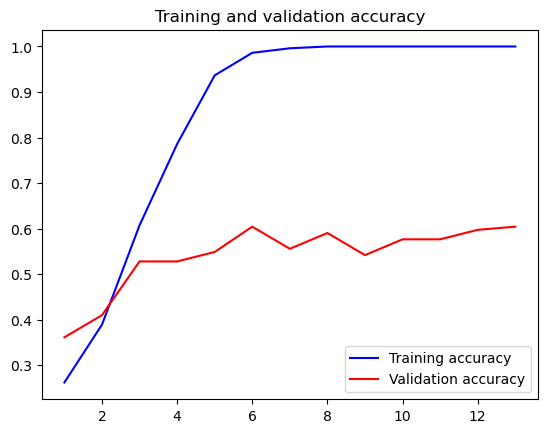

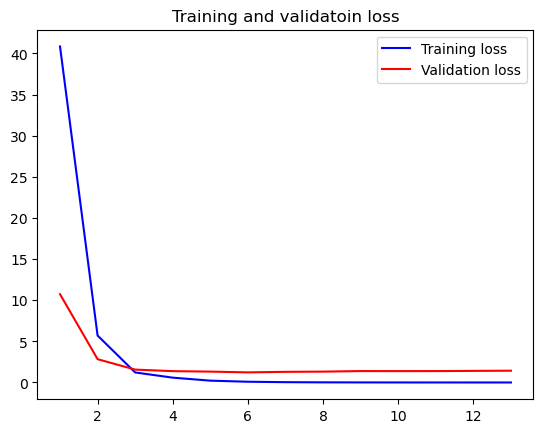

In [119]:
# Displaying curves of loss and accuracy during traininig
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validatoin loss')
plt.legend()
plt.show()

In [120]:
import numpy as np

# Predict on test set
y_pred = test_model.predict(X_test)
# Convert probabilities to predicted class labels
y_pred_class = np.argmax(y_pred, axis=1)
# Convert y_test from one-hot encoding to true class labels
y_test_class = np.argmax(y_test, axis=1)

3/3 [==============================] - 0s 62ms/step


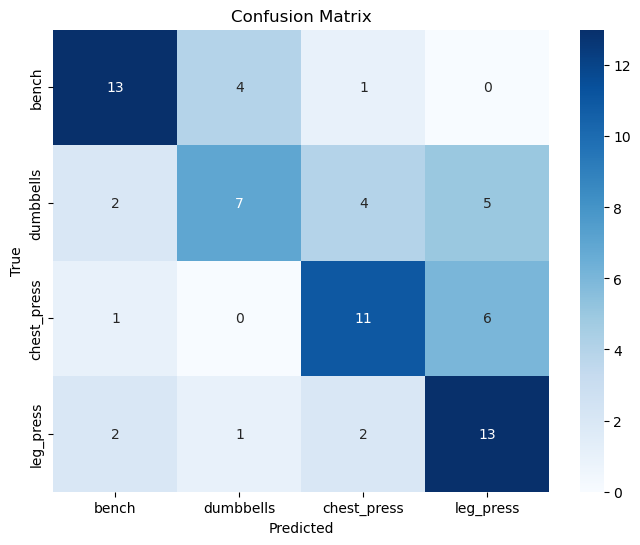

In [121]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Now, you can calculate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test_class, y_pred_class, average='macro')
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test_class, y_pred_class, average='macro')
print(f"Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test_class, y_pred_class, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 61.11%
Precision: 61.46%
Recall: 61.11%
F1 Score: 60.48%


The model achieved an **accuracy of 61.11%**, indicating that it correctly predicted the class for just over 60% of the test set. The **precision of 61.46%** suggests that when the model predicted a class, it was correct 61.46% of the time, while the **recall of 61.11%** shows that it correctly identified 61.11% of all instances belonging to a given class. The **F1 score, at 60.48%,** reflects a balance between precision and recall. These results suggest the model is performing better than random guessing but still has room for improvement.

The confusion matrix showed that the model struggled the most with distinguishing dumbbells and the chest press machine. This could be due to similar shapes or positions of the gym equipment in the images.

In summary, while the basic CNN model achieved a decent performance, it still has many areas for improvement.

## Task 3.4: Data Augmentation (Iteration 2)

### A: Preprocessing

For this iteration, the dataset preprocessing was similar to the previous step, where I encoded the labels. The main focus of this section was to experiment with data augmentation. Using `ImageDataGenerator`, I applied different augmentation techniques, such as rotation, horizontal flipping, zooming, and shifting. I generated augmented images and manually inspected them to ensure key features of the equipment remained in the image. Initially, I found that applying all the transformations together caused the loss of important details. As a result, I decided to remove the height and width shifts, as they seemed too unreliable for my dataset. I also reduced the rotation range to 10 degrees and the zoom range to 0.1 to keep the images from becoming too distorted. 

In [123]:
X, y = get_features_and_labels(base_dir, class_labels, target_size)

In [124]:
# Split and prepare dataset
X_train, X_valid, X_test, y_train, y_valid, y_test = split_and_prepare_dataset(X, y, label_mapping)

Training set size: 504
Validation set size: 144
Test set size: 72


In [125]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((504, 256, 256, 3),
 (504, 4),
 (144, 256, 256, 3),
 (144, 4),
 (72, 256, 256, 3),
 (72, 4))

In [126]:
from keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.1)

In [127]:
def generateImages(image, num_images):
    new_images = []
    image = np.reshape(image, (1,) + image.shape)
    for _ in range(num_images):
        batch = next(data_gen.flow(image, batch_size=1))
        new_images.append(batch[0])
    return np.array(new_images)

In [128]:
import skimage as ski

image = ski.io.imread('../Data/equipment/leg_press/leg_press_91.jpg')
image = ski.util.img_as_float(image)

augmented_images = generateImages(image, 8)

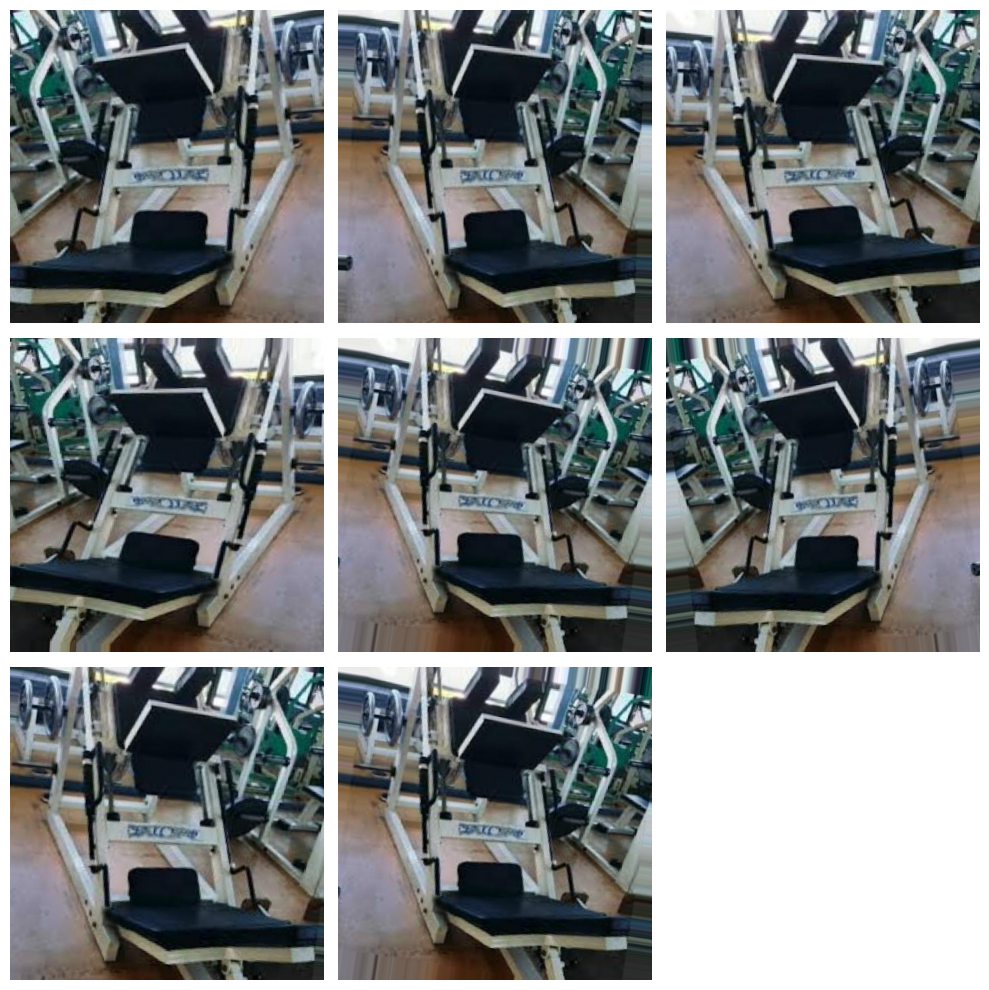

In [129]:
import matplotlib.pyplot as plt
import math

num_images = len(augmented_images)
grid_size = int(math.ceil(math.sqrt(num_images)))

fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(10, 10))
axes = axes.flatten()

for i in range(grid_size * grid_size):
    if i < num_images:
        axes[i].imshow(augmented_images[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### B: CNN Architecture

Once I fine-tuned the augmentation parameters, I incorporated them as separate layers in the CNN architecture. Specifically, I added `RandomRotation`, `RandomFlip`, and `RandomZoom` layers before any `Conv2D` layer, directly after the `Input` layer. For the additional layers, I used the same CNN architecture from Task 3.3 for this model.

In [ ]:
# Add your code to create an MLP architecture suitable for your image dataset.
from keras.models import Model
from keras import Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import RandomFlip, RandomRotation, RandomZoom

# Create a CNN model
inputs = Input(shape=(256, 256, 3))

# Augmentation layers
x = RandomRotation(0.1)(inputs)
x = RandomFlip('horizontal')(x)
x = RandomZoom(0.1)(x)

# Convolutional layers (your original model)
x = Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(4, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

### C: CNN Training

The training process followed the same approach as in Task 3.3.

In [131]:
# Add your code to train the MLP model using early stopping and different learning rates.
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00007), loss='categorical_crossentropy', metrics=['accuracy'])

In [132]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
monitor_val_loss = EarlyStopping(monitor='val_loss',
                                 patience=7,
                                 restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
        filepath=f'{models_dir}cnn_task_3-4.keras',
        save_best_only=True,
        monitor='val_loss')

callbacks = [
    monitor_val_loss,
    model_checkpoint,
]

In [133]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=30,
                    callbacks=callbacks,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 7s 382ms/step - loss: 21.7087 - accuracy: 0.3056 - val_loss: 7.9908 - val_accuracy: 0.3472
Epoch 2/30
16/16 [==============================] - 6s 368ms/step - loss: 3.5423 - accuracy: 0.3690 - val_loss: 2.0201 - val_accuracy: 0.3889
Epoch 3/30
16/16 [==============================] - 6s 372ms/step - loss: 1.3935 - accuracy: 0.4643 - val_loss: 1.5032 - val_accuracy: 0.3958
Epoch 4/30
16/16 [==============================] - 6s 364ms/step - loss: 1.1468 - accuracy: 0.4921 - val_loss: 1.3307 - val_accuracy: 0.4375
Epoch 5/30
16/16 [==============================] - 6s 363ms/step - loss: 0.9744 - accuracy: 0.5873 - val_loss: 1.2970 - val_accuracy: 0.4444
Epoch 6/30
16/16 [==============================] - 6s 366ms/step - loss: 0.8614 - accuracy: 0.6825 - val_loss: 1.4142 - val_accuracy: 0.4792
Epoch 7/30
16/16 [==============================] - 6s 362ms/step - loss: 0.8739 - accuracy: 0.6607 - val_loss: 1.1607 - val_accuracy: 0.4653
Epoch

### D: Model Evaluation

With data augmentation techniques, the model's accuracy increased significantly to **75.00%** after training for 29 epochs out of the planned 30.

In [134]:
# Add your code to evaluate the MLP model using appropriate metrics and learning curves.
from keras.models import load_model
test_model = load_model(f'{models_dir}cnn_task_3-4.keras')

test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

3/3 [==============================] - 0s 64ms/step - loss: 0.7942 - accuracy: 0.7500
Test accuracy: 0.750


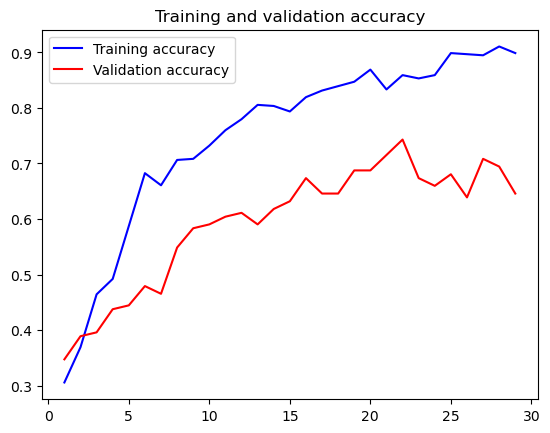

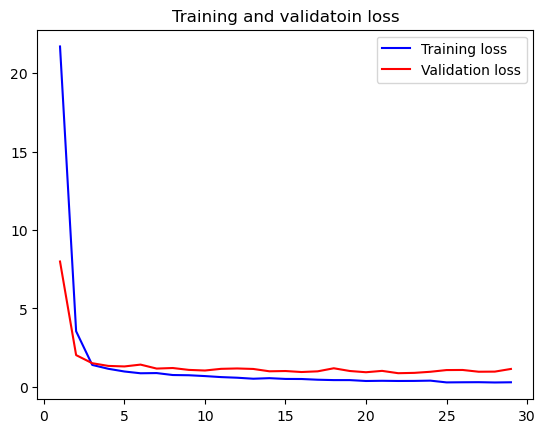

In [135]:
# Displaying curves of loss and accuracy during traininig
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validatoin loss')
plt.legend()
plt.show()

In [136]:
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)
# Convert probabilities to predicted class labels
y_pred_class = np.argmax(y_pred, axis=1)
# Convert y_test from one-hot encoding to true class labels
y_test_class = np.argmax(y_test, axis=1)

3/3 [==============================] - 0s 64ms/step


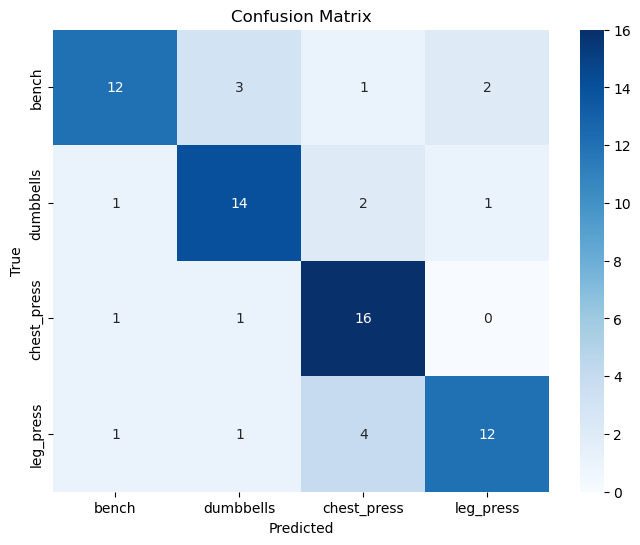

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Now, you can calculate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test_class, y_pred_class, average='macro')
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test_class, y_pred_class, average='macro')
print(f"Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test_class, y_pred_class, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 75.00%
Precision: 75.81%
Recall: 75.00%
F1 Score: 74.79%


The confusion matrix showed that the model had improved in distinguishing between dumbbells and chest press. However, confusion remained for leg press and bench equipment, where leg press was often confused with chest press, and benches with dumbbells and leg press. Overall, the augmented dataset significantly improved the model's performance, especially in differentiating between more challenging classes.

## Task 3.5: Transfer Learning (Iteration 3)

### A: Preprocessing

To apply transfer learning, I first one-hot encoded the labels, similar to previous iterations. Transfer learning relies on leveraging pre-trained models to save computational resources and take advantage of features already learned on large datasets. For this task, I explored two pre-trained models:
1. **`MobileNetV2`**
- **Why it fits:** MobileNetV2 is designed to be fast and efficient, which is great when you have limited computational resources. It’s lightweight but still delivers good performance for image classification tasks.
- **How it helps my images:** MobileNetV2 is good at handling different backgrounds, including plain or messy ones. Since the gym equipment in my dataset has varying backgrounds, this makes it a strong choice.
- **Advantages:**
    - Lightweight and fast to use.
    - Works well for small and medium-sized datasets.
    - Handles background variations effectively.

2. **`EfficientNet`**
- **Why it fits:** EfficientNet balances accuracy and efficiency well. It uses a special method called “compound scaling” to adjust its size based on available resources, making it versatile for different needs.
- **How it helps my images:** EfficientNet is great at providing high accuracy with fewer resources. This makes it useful for images with a lot of background variation.
- **Advantages:**
    - Very efficient with resources.
    - Consistent performance across diverse datasets.

In [139]:
X, y = get_features_and_labels(base_dir, class_labels, target_size)

In [140]:
# Split and prepare dataset
X_train, X_valid, X_test, y_train, y_valid, y_test = split_and_prepare_dataset(X, y, label_mapping)

Training set size: 504
Validation set size: 144
Test set size: 72


In [141]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((504, 256, 256, 3),
 (504, 4),
 (144, 256, 256, 3),
 (144, 4),
 (72, 256, 256, 3),
 (72, 4))

In [142]:
from keras.applications import mobilenet_v2
conv_base = mobilenet_v2.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3))

In [143]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['bn_Conv1[

### B: CNN Architecture

I tested both models and found that `MobileNetV2` worked best for my dataset. It was faster and handled the variations in gym equipment images effectively. I used the MobileNetV2 pre-trained base as the first part of my CNN, followed by layers customized for my classification task. For this step, I didn’t include data augmentation so I could focus on the improvements brought by transfer learning alone.

In [144]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Create a CNN model
model = Sequential([
    conv_base,
    Flatten(input_shape=(4, 4, 1024)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(rate=0.5),
    Dense(4, activation='softmax'),
])

### C: CNN Training

The training process was similar to the earlier models. I used the `Adam` optimizer with a learning rate of 0.00007, which, after experimenting with different values, gave the best results. The model trained for 21 epochs out of 30, but overfitting started early, which is common with transfer learning on small datasets.

In [145]:
# Add your code to train the MLP model using early stopping and different learning rates.
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00007), loss='categorical_crossentropy', metrics=['accuracy'])

In [146]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
monitor_val_loss = EarlyStopping(monitor='val_loss',
                                 patience=7,
                                 restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
        filepath=f'{models_dir}cnn_task_3-5.keras',
        save_best_only=True,
        monitor='val_loss')

callbacks = [
    monitor_val_loss,
    model_checkpoint,
]

In [147]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=30,
                    callbacks=callbacks,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 28s 1s/step - loss: 1.1189 - accuracy: 0.5933 - val_loss: 1.1902 - val_accuracy: 0.5278
Epoch 2/30
16/16 [==============================] - 16s 1s/step - loss: 0.2544 - accuracy: 0.9167 - val_loss: 0.8144 - val_accuracy: 0.7292
Epoch 3/30
16/16 [==============================] - 16s 1s/step - loss: 0.0871 - accuracy: 0.9683 - val_loss: 0.6382 - val_accuracy: 0.7986
Epoch 4/30
16/16 [==============================] - 17s 1s/step - loss: 0.0633 - accuracy: 0.9841 - val_loss: 0.5150 - val_accuracy: 0.8333
Epoch 5/30
16/16 [==============================] - 17s 1s/step - loss: 0.0351 - accuracy: 0.9881 - val_loss: 0.4590 - val_accuracy: 0.8611
Epoch 6/30
16/16 [==============================] - 16s 1s/step - loss: 0.0316 - accuracy: 0.9921 - val_loss: 0.3024 - val_accuracy: 0.8819
Epoch 7/30
16/16 [==============================] - 17s 1s/step - loss: 0.0155 - accuracy: 0.9980 - val_loss: 0.2957 - val_accuracy: 0.9306
Epoch 8/30
16/16 [==

### D: Model Evaluation

Evaluating the model on the test set, I achieved accuracy of **95,83%**, which showcases the power of transfer learning.

In [148]:
# Add your code to evaluate the MLP model using appropriate metrics and learning curves.
from keras.models import load_model
test_model = load_model(f'{models_dir}cnn_task_3-5.keras')

test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

3/3 [==============================] - 1s 147ms/step - loss: 0.2039 - accuracy: 0.9583
Test accuracy: 0.958


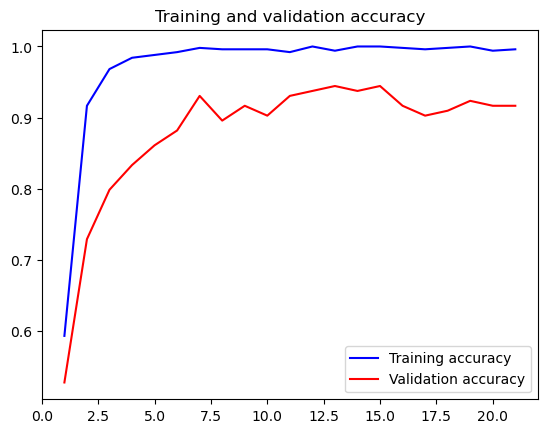

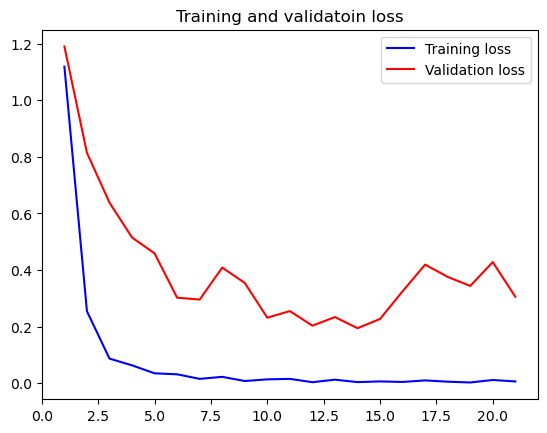

In [149]:
# Displaying curves of loss and accuracy during traininig
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validatoin loss')
plt.legend()
plt.show()

In [150]:
import numpy as np

# Predict on test set
y_pred = test_model.predict(X_test)
# Convert probabilities to predicted class labels
y_pred_class = np.argmax(y_pred, axis=1)
# Convert y_test from one-hot encoding to true class labels
y_test_class = np.argmax(y_test, axis=1)

3/3 [==============================] - 1s 133ms/step


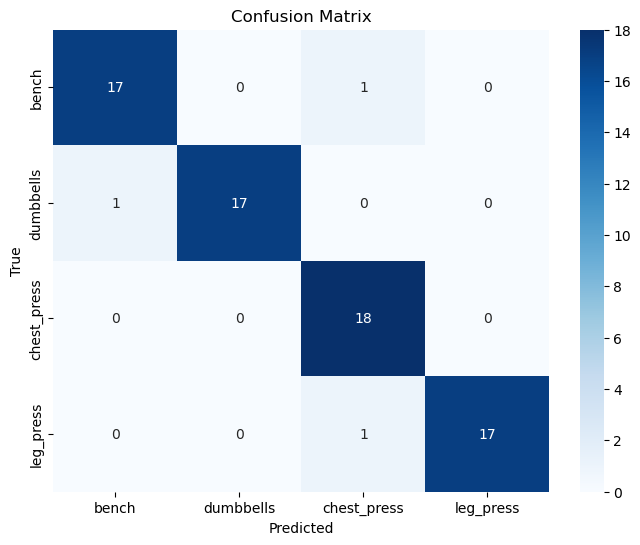

In [151]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Now, you can calculate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test_class, y_pred_class, average='macro')
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test_class, y_pred_class, average='macro')
print(f"Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test_class, y_pred_class, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 95.83%
Precision: 96.11%
Recall: 95.83%
F1 Score: 95.87%


The model achieved:
- Accuracy: 95.83%
- Precision: 96.11%
- Recall: 95.83%
- F1 Score: 95.87%

The confusion matrix showed great performance, with all chest press images classified correctly. For the other classes, the model only missed one image each, showing significant improvement compared to earlier tasks.

The accuracy and precision improvement shows how powerful transfer learning is. By using `MobileNetV2`’s pre-trained features, I could skip building everything from scratch and still achieve great results. This method worked especially well because my dataset is small, and transfer learning already has strong general features to work with.

## Task 3.6: Model Improvement (Iteration 4)

### Reflections on Tasks 3.3 to 3.5
Reflecting on tasks carried out until now, these are my main takeaways:
- **Tuning Hyperparameters:**
Adjusting settings like learning rate, number of epochs, and batch size is very important for improving how well the model works. Finding the right values for these settings made a big difference in how the model learned and performed.
- **Data Augmentation:**
Data augmentation is a great way to make a small dataset more useful. By creating new versions of the images (like flipping, zooming, or rotating them), I was able to increase the variety of the training data. This helped the model learn better and reduce overfitting.
- **Transfer Learning:**
Transfer learning made a huge impact. Using pre-trained models like `MobileNetV2` allowed me to take advantage of features already learned from large datasets. This approach gave my model a big performance boost without needing a large dataset to train from scratch.
- **Combining Methods:**
Combining techniques like data augmentation and transfer learning seems promising. Augmentation can make the dataset stronger, and transfer learning provides a solid base for the model. This will be the focus of the next and final iteration.
- **Trying Different Architectures:**
Exploring different model designs also helped improve the results. Each task showed how important it is to test different setups to see what works best. In the next task, I’ll mix these techniques and try new designs to get even better performance.

These lessons show how experimenting and making small improvements step by step can lead to better results.

### A: Preprocessing

For this final iteration, I combined what I learned from Tasks 3.3 to 3.5 to refine the preprocessing and architecture. As before, I encoded the labels and started with the convolutional base from `MobileNetV2`.

In [247]:
X, y = get_features_and_labels(base_dir, class_labels, target_size)

In [248]:
# Split and prepare dataset
X_train, X_valid, X_test, y_train, y_valid, y_test = split_and_prepare_dataset(X, y, label_mapping)

Training set size: 504
Validation set size: 144
Test set size: 72


In [249]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((504, 256, 256, 3),
 (504, 4),
 (144, 256, 256, 3),
 (144, 4),
 (72, 256, 256, 3),
 (72, 4))

In [250]:
from keras.applications import mobilenet_v2
conv_base = mobilenet_v2.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3))

In [251]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_10[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['bn_Conv1[

### B: CNN Architecture

Building on previous experiments, I added data augmentation layers to improve the model's ability to generalize by creating varied training samples. These included random rotation, random flip, and random zoom.

I then explored two different CNN architectures and adjusted hyperparameters like learning rate, epochs, and patience to find the best approach:

### **Architecture 1: Adding Convolutional Layers**
In this architecture, I added additional convolutional layers after the `MobileNetV2` base to further extract detailed features. This was followed by a `MaxPooling2D` layer to reduce spatial dimensions, `Flatten`ing to prepare the data for dense layers, and several `Dense` layers for classification. A `Dropout` layer was also included to prevent overfitting.

Here’s the structure:
```python
model = Sequential([
    RandomRotation(0.1),
    RandomFlip('horizontal'),
    RandomZoom(0.1),
    conv_base,
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax'),
])
```
This model ran for all 30 epochs and achieved a test accuracy of 95.8%.

### **Architecture 2: Adding Global Pooling Layers**
In the second architecture, instead of flattening the feature maps, I used a `GlobalAveragePooling2D` layer. This approach condenses the feature maps into a single value per feature, helping to reduce overfitting by simplifying the data. The architecture also included dense layers and a dropout layer for further regularization.

Here’s the structure:
```python
model = Sequential([
    RandomRotation(0.1),
    RandomFlip('horizontal'),
    RandomZoom(0.2),
    conv_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(4, activation='softmax'),
])
```
This model trained for all 23 epochs out of 30 and achieved a test accuracy of 97.00%.

In [252]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, RandomRotation, RandomFlip, RandomZoom, GlobalAveragePooling2D

# Create a CNN model
model = Sequential([
    RandomRotation(0.1),
    RandomFlip('horizontal'),
    RandomZoom(0.1),
    conv_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(4, activation='softmax'),
])


### C: CNN Training

After having defined the desired architecture, I trained in a similar way as in Tasks 3.3-3.5. 

In [253]:
# Add your code to train the MLP model using early stopping and different learning rates.
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

In [254]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
monitor_val_loss = EarlyStopping(monitor='val_loss',
                                 patience=10,
                                 restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
        filepath=f'{models_dir}cnn_task_3-6.keras',
        save_best_only=True,
        monitor='val_loss')

callbacks = [
    monitor_val_loss,
    model_checkpoint,
]

In [255]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=60,
                    callbacks=callbacks,
                    validation_data=(X_valid, y_valid))

Epoch 1/60
16/16 [==============================] - 28s 1s/step - loss: 1.4099 - accuracy: 0.3690 - val_loss: 1.4269 - val_accuracy: 0.3750
Epoch 2/60
16/16 [==============================] - 16s 977ms/step - loss: 0.9342 - accuracy: 0.6012 - val_loss: 1.1709 - val_accuracy: 0.5278
Epoch 3/60
16/16 [==============================] - 16s 982ms/step - loss: 0.6849 - accuracy: 0.7579 - val_loss: 0.9932 - val_accuracy: 0.6181
Epoch 4/60
16/16 [==============================] - 15s 960ms/step - loss: 0.4613 - accuracy: 0.8552 - val_loss: 0.8663 - val_accuracy: 0.7014
Epoch 5/60
16/16 [==============================] - 15s 974ms/step - loss: 0.3795 - accuracy: 0.8770 - val_loss: 0.7379 - val_accuracy: 0.7361
Epoch 6/60
16/16 [==============================] - 16s 993ms/step - loss: 0.2949 - accuracy: 0.8929 - val_loss: 0.6596 - val_accuracy: 0.7500
Epoch 7/60
16/16 [==============================] - 16s 1s/step - loss: 0.2403 - accuracy: 0.9345 - val_loss: 0.5578 - val_accuracy: 0.7917
Epoch

### D: Model Evaluation

This model trained for 33 epochs out of 60 (with patience set to 10) and achieved a test **accuracy of 97.22%**. A learning rate of 0.00005 proved to be optimal for this setup.

In [256]:
# Add your code to evaluate the MLP model using appropriate metrics and learning curves.
from keras.models import load_model
test_model = load_model(f'{models_dir}cnn_task_3-6.keras')

test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

3/3 [==============================] - 3s 147ms/step - loss: 0.1843 - accuracy: 0.9722
Test accuracy: 0.972


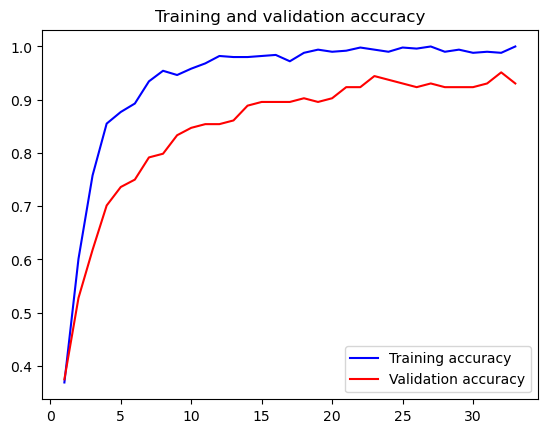

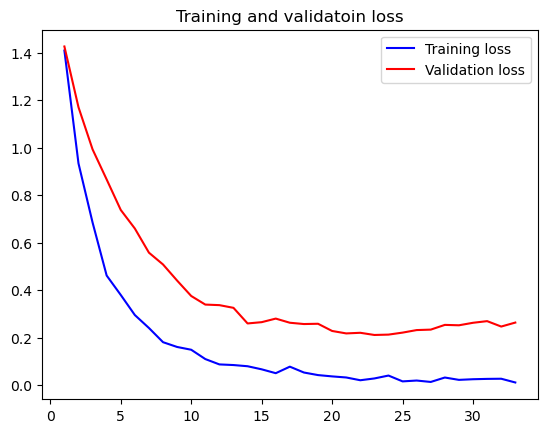

In [257]:
# Displaying curves of loss and accuracy during traininig
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validatoin loss')
plt.legend()
plt.show()

In [258]:
import numpy as np

# Predict on test set
y_pred = test_model.predict(X_test)
# Convert probabilities to predicted class labels
y_pred_class = np.argmax(y_pred, axis=1)
# Convert y_test from one-hot encoding to true class labels
y_test_class = np.argmax(y_test, axis=1)

3/3 [==============================] - 1s 137ms/step


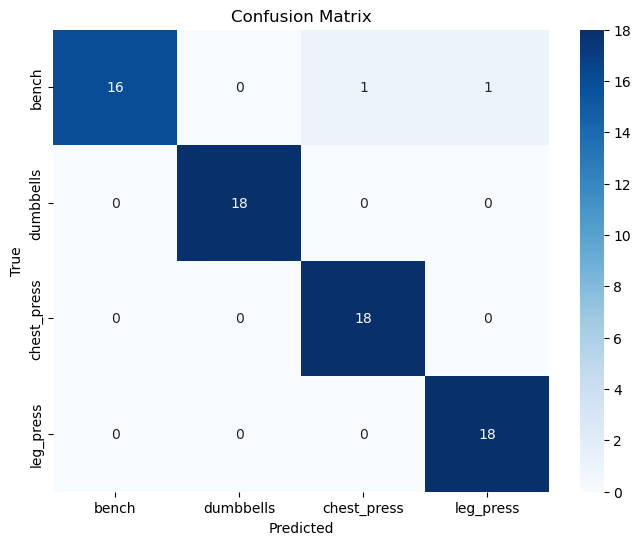

In [259]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Now, you can calculate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [260]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test_class, y_pred_class, average='macro')
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test_class, y_pred_class, average='macro')
print(f"Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test_class, y_pred_class, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 97.22%
Precision: 97.37%
Recall: 97.22%
F1 Score: 97.18%


The second architecture, using global pooling layers, delivered the best results. The learning curves showed steady progress.

The model achieved:
- **Accuracy:** 97.22%
- **Precision:** 97.37%
- **Recall:** 97.22%
- **F1 Score:** 97.18%

The confusion matrix showed that the model performed well across most classes. The only issues were two images of benches that were misclassified—one as a chest press and one as a leg press. This suggests minor confusion between similar machines.

### E: Model Evaluation on Holdout Set

To ensure the model’s performance was realistic, I manually created a **holdout set of 18 new images**. These were taken at different gyms, with varying lighting and backgrounds, to simulate real-world conditions. On this holdout set, the model achieved an **accuracy of 94.12%**.

The only misclassification occurred when the model predicted a chest press as a leg press. Upon reviewing the image, the complex background likely caused confusion. I am highly satisfied with this result, as it matches my HLP benchmark accuracy.

In [291]:
X_holdout, y_holdout = get_features_and_labels(f'{base_dir}/holdout', class_labels, target_size)

In [292]:
y_labels = y_holdout

In [293]:
from keras.utils import to_categorical

y_holdout = np.array([label_mapping[label] for label in y_holdout])
y_holdout = to_categorical(y_holdout)

In [294]:
# Evaluate on the holdout set
holdout_loss, holdout_acc = test_model.evaluate(X_holdout, y_holdout)
print(f'Holdout accuracy: {holdout_acc:.3f}')

1/1 [==============================] - 0s 166ms/step - loss: 0.1839 - accuracy: 0.9412
Holdout accuracy: 0.941


In [295]:
y_holdout_pred = test_model.predict(X_holdout)

1/1 [==============================] - 0s 144ms/step


In [307]:
# Reverse the label mapping dictionary
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Convert softmax predictions to class indices
predicted_indices = np.argmax(y_holdout_pred, axis=1)

# Map class indices back to labels
predicted_labels = [reverse_label_mapping[index] for index in predicted_indices]


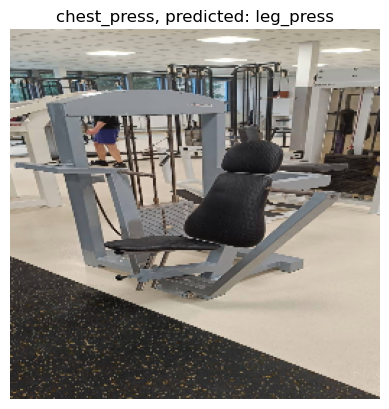

In [ ]:
# Error analysis
import matplotlib.pyplot as plt

for i in range(len(X_holdout)):
    if y_labels[i] != predicted_labels[i]:
        plt.imshow(X_holdout[i])
        plt.title(f'{y_labels[i]}, predicted: {predicted_labels[i]}')
        plt.axis('off')
        plt.show()

### **Final Reflections**
Reflecting on this task and the Tasks 3.3 to 3.6, several key insights stand out:
- **Combining Techniques:** Mixing transfer learning, data augmentation, and different architecture choices provided the best results. These techniques complemented each other and greatly boosted model performance.
- **Importance of Testing:** Testing on a holdout set with real-world images added extra confidence in the model’s ability to generalize beyond the training dataset.
- **Iterative Improvements:** Each task built on the previous one, showing that small, step-by-step improvements can lead to big overall improvements.
- **Real-world Challenges:** Even with strong results, there’s room for improvement in handling complex backgrounds or lighting variations.

This final iteration demonstrates the effectiveness of combining advanced techniques while keeping the focus on real-world applications. The model is now well-optimized and ready for practical use.

## Task 3.7: Error Analysis

### A: Wrong Classifications

To perform the error analysis, I separated the misclassified images from the correctly predicted ones. I manually inspected the misclassified images and identified two errors, both involving the bench class.

In [ ]:
import numpy as np
from tensorflow import one_hot, argmax

# One hot encode the predictions
y_pred_encoded = one_hot(argmax(y_pred, axis = 1), depth=4)

# Find instances where predictions do not match labels
mismatches = np.where(np.any(y_pred_encoded != y_test, axis=1))[0]

# Store the wrong predictions
wrong_predictions = X_test[mismatches]

In [298]:
# Reverse the label mapping dictionary
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Convert softmax predictions to class indices
predicted_indices = np.argmax(y_pred, axis=1)

# Map class indices back to labels
predicted_labels = [reverse_label_mapping[index] for index in predicted_indices]

In [269]:
for i in mismatches:
    print(y_pred_encoded[i]) 

tf.Tensor([0. 0. 1. 0.], shape=(4,), dtype=float32)
tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)


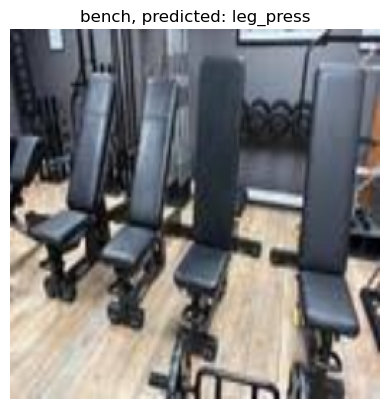

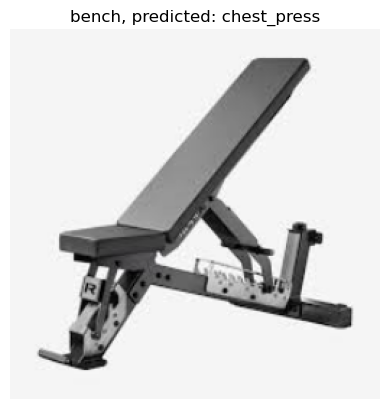

In [300]:
import matplotlib.pyplot as plt

for i in range(len(wrong_predictions)):
    plt.imshow(wrong_predictions[i])
    plt.title(f'{y_labels[i]}, predicted: {predicted_labels[i]}')
    plt.axis('off')
    plt.show()

### B: Identify Error Types

1. **Image 1:** This bench image was incorrectly classified as a leg press. The error seems to be caused by the image’s poor quality and a background filled with multiple elements, which might have confused the model.
    - **Error Type:** Background Confusion
2. **Image 2:** Another bench image with a plain white background was also misclassified. This one was identified as a chest press, but there were no clear visual clues as to why.
    - **(Possible) Error Type:** Inter-Class Similarity

### C: Categorize Errors

### **Misclassified Images**
Using the inspection results, I categorized the errors based on their characteristics:
- **Image 1:**
    - **Error Type:** Background Confusion
    - **Reason:** A complex and cluttered background likely diverted the model’s attention from the main subject.
- **Image 2:**
    - **Error Type:** Inter-Class Similarity
    - **Reason:** The bench and chest press may share some structural features, leading the model to misclassify this image.

### **Error Percentages**
Given there were **18 images** per class and a total of **4 classes** (72 images) in the test set, the error breakdown is as follows:
- **Background Confusion:** 1 error (1.39% of the total dataset, 50% of all errors)
- **Inter-Class Similarity:** 1 error (1.39% of the total dataset, 50% of all errors)

The remaining 70 images (97.22%) were classified correctly.

### D: Propose Improvements

### **Hypotheses on Errors**
- **Insufficient Variability in Training Data:** The model might not have seen enough examples of benches with varied backgrounds or unique features during training. This could make it harder for the model to generalize and distinguish them from other classes.
- **Shared Features Between Classes:** The similarity between classes might confuse the model.

### **Potential Improvements**
To address these issues, I the following strategies could be implemented:
- **Improve Training Data:** Collect more images, particularly those with diverse backgrounds, orientations, and lighting conditions.
- **Regularization Techniques:** Incorporate dropout layers or other regularization methods to prevent overfitting to specific background features.
- **Adjust Model Architecture:** Experiment with CNN architectures that help the model focus on the subject rather than irrelevant background details.


### **Conclusion**
This error analysis highlights how even a highly accurate model can face challenges in specific scenarios. By addressing issues related to insufficient data diversity, inter-class similarities, and background bias, the model can achieve even better generalization and reliability in real-world applications.

## **Final Reflection on the Project**
This project showcased the power of deep learning techniques while also highlighting the challenges that arise in practical applications. Here are my key takeaways and reflections:
- **Learning and Iteration**
Each task was built upon the previous one, reinforcing the importance of iterative improvements in machine learning projects. From designing a basic CNN to implementing advanced techniques like data augmentation and transfer learning, the progression showcased how a combination of experimentation, analysis, and adjustments can significantly enhance model performance.
- **The Importance of Data**
Challenges like class imbalances, limited sample sizes, and varying image conditions revealed how crucial it is to have diverse and representative training data. Data augmentation proved important in reducing these limitations by expanding the dataset.
- **Transfer Learning**
Transfer learning was a crucial step in improving the model's performance. Using pre-trained networks like `MobileNetV2` allowed the model to benefit from features learned on large-scale datasets, which geatly improved accuracy.
- **Error Analysis**
The error analysis performed showed that even a high-performing model can have blind spots, such as background confusion and inter-class similarities.
- **Challenges**
One of the main challenges was achieving a balance between model complexity and generalization. Adding more layers or fine-tuning often led to overfitting, while simpler models lacked the capacity to handle the differences of the dataset.
- **Real-World Impact**
Testing the model on manually collected holdout images was a key step in confidently deploying the model in real-world scenarios. This test revealed that while the model performed well overall, it still struggled with certain conditions like cluttered backgrounds or unusual lighting. Addressing these issues in future iterations would make the model even more reliable.
- **Future Steps**
Future steps could involve integrating additional techniques, such as ensemble models, to further boost performance. Gathering a more diverse dataset could also prove valuable and significantly improve the model.